# Project: Investigate a Dataset (The Movie Database Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset incluces information about 10,000 movies collected from TMDB(The Movie Database). It has 10866 rows and 21 columns. We'll look at the data and remove unnecessary data and clean the dataset and then perform the analysis to get results in the form of visuals. This dataset contains various information about the movie like runtime, popularity, production companies, director, cast etc. We'll dive deep inside as we go move ahead in this notebook. I'll be answering the following question from this dataset. 

## Questions
**1.** Which movie has minimum and maximum runtime?

**2.** Which movie has minimum and maximum budget?

**3.** Which movie has minimum and maximum revenue?

**4.** Which movie has minimum and maximum profit?

**5.** Number of movies released from 1960 to 2015?

**6.** What is the mean and total profit per year from 1960 to 2015?

**7.** Which movies are in top and bottom 10 in terms of profit?

**8.** Which movies are in top and bottom 10 in terms of revenue?

**9.** Which movies are in top and bottom 10 in terms of budget?

**10.** Which movies are in top and bottom 10 in terms of runtime?

**11.** How has runtime, profit, budget and revenue changed over the course of time?

**12.** Which months has maximum number of releases?

**13.** Movies released in which months makes the most profit?

**14.** Under which genre maximum number of movies have been released?

**15.** Which cast has been casted the most number of movies?

**16.** Which producer has produced the most number of movies?

**17.** Which director has directed the most number of movies?

**18.** How different variable affects profit and which affects the most?

**19.** How vote count and vote average correlate?

**20.** How runtime affects the rating and popularity of the movie?

In [57]:
# if error module 'seaborn' has no attribute 'lineplot' is given, please run the following code
#!conda install -y -c anaconda seaborn=0.9.0

In [58]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> After looking at the dataset, we'll remove the unwanted data and make the dataset as clean as possible
### General Properties

In [59]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

#printing the first five rows of the database
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [60]:
#prints info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [61]:
#prints the stats about the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Removing the unnecessary data from the dataset)

**Changes to be done are as follow:**

**1.** Duplicated needs to removed.

**2.** There are extra columns which needs to be removed like imdb_id,keywords, homepage etc.

**3.** The 0's in the rows need to be replaced with Nan so all the Nan can be removed.
 
**4.** The revenue and budget columns needs to be changed to int. 

**3.** The release_date column needs to be changed to datetime format

### 1. Removing duplicated from the dataset

In [62]:
#print the row with the duplicate
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [63]:
#drop the duplicate row
df.drop_duplicates(inplace=True)

In [64]:
#test if we the code worked
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### 2. Removing extra columns which are not necessary for the computation

In [65]:
#make a variable that has all the name of the columns to be removed
drop_col = ['imdb_id','homepage','keywords','tagline','overview']

#removes all the columns with the drop function
df = df.drop(drop_col,1)

### 3. Replace the  0's with Nan and remove all nul values.

In [66]:
#checks the total number of null values in each columns
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [67]:
#replace the 0 with null values
df.revenue.replace(0,np.NAN, inplace=True)
df.budget.replace(0,np.NAN, inplace=True)
df.runtime.replace(0,np.NAN, inplace=True)
df.budget_adj.replace(0,np.NAN, inplace=True)
df.revenue_adj.replace(0,np.NAN, inplace=True)

In [68]:
#drop all the null values
df.dropna(inplace=True)

In [69]:
#check if all the null have been removed
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### 4. Changing the format for budget and revenue to integer.

In [70]:
#converts the budget to int type and print first 5 rows
df.budget.astype(int, inplace=True).head()

0    150000000
1    150000000
2    110000000
3    200000000
4    190000000
Name: budget, dtype: int64

In [71]:
#converts the revenue to int type and print first 5 rows
df.revenue.astype(int, inplace=True).head(5)

0    1513528810
1     378436354
2     295238201
3    2068178225
4    1506249360
Name: revenue, dtype: int64

### 5. Changing the format for release_date to datetime

In [72]:
#converts the release_date to datetime
df.release_date = pd.to_datetime(df.release_date)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Calculating the minimum and maximum runtime)

In [73]:
#defined a variable with to find the minimum
min_runtime = df.runtime.min()

#prints the row with minimum value
df.query('runtime==@min_runtime')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5162,24914,0.208637,10.0,5.0,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15.0,Science Fiction|Animation,Studio 4Â°C,2003-06-02,16,6.8,2003,11.853526,5.926763


In [74]:
#defined a variable with to find the maximum
max_runtime = df.runtime.max()

#prints the row with maximum value
df.query('runtime==@max_runtime')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2107,43434,0.534192,18000000.0,871279.0,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,338.0,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,2010-05-19,35,6.2,2010,18000000.0,871279.0


**We can see from the above results that the minimum runtime is at index no. 5152 is 15 minutes and maximum is at 2107 with runtime of 338 minutes.**

### Research Question 2  (Calculating the minimum and maximum budget)

In [75]:
#defined a variable with to find the minimum
min_budget = df.budget.min()

#prints the row with minimum value
df.query('budget==@min_budget')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2618,39964,0.090186,1.0,100.0,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95.0,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,1999-04-23,14,4.8,1999,1.309053,130.905285
3581,59296,0.520430,1.0,1378.0,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,90.0,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,2011-06-03,55,5.3,2011,0.969398,1335.830503


In [76]:
#defined a variable with to find the maximum
max_budget = df.budget.max()

#prints the row with maximum value
df.query('budget==@max_budget')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0


**We can see from the above results that the minimum budget is at 2 index no. 2618 and 3581 which is 1 dollar and maximum is at 2244 with budget of 425,000,000 dollars**

### Research Question 3  (Calculating the minimum and maximum revenue)

In [77]:
#defined a variable with to find the minimum
min_revenue = df.revenue.min()

#prints the row with minimum value
df.query('revenue==@min_revenue')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5067,13537,0.462609,6000000.0,2.0,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94.0,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,2003-11-14,46,6.4,2003,7.112116e+06,2.370705
8142,2293,0.552091,6000000.0,2.0,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94.0,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,1995-10-20,201,6.8,1995,8.585801e+06,2.861934


In [78]:
#defined a variable with to find the maximum
max_revenue = df.revenue.max()

#prints the row with maximum value
df.query('revenue==@max_revenue')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


**We can see from the above results that the minimum revenue is at 2 index no. 5067 and 8142 which is 2 dollar and maximum is at 1386 with revenue of  2,781,506,000 dollars**

### Research Question 4  (Calculating the minimum and maximum profit)

In [79]:
#create a new column profit by subtracting budget from revenue
df['profit'] = df.revenue-df.budget

In [80]:
#prints the movie row with maximum profit
df.query('profit==@df.profit.min()')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0,-413912431.0


In [81]:
#prints the movie row with minimum profit
df.query('profit==@df.profit.max()')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09


**We can see from the above results that the minimum profit is at index no. 2244 which is -413,912,431 dollar and maximum is at 1386 with revenue of  2,544,506,000 dollars**

### Research Question 5  (Number of movies released from 1960 to 2015)

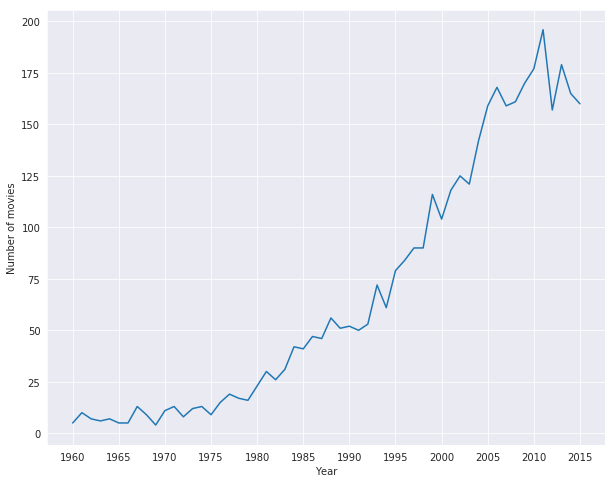

In [82]:
#total movie released per year since 1960

#groups the data by release year and counts the number of element in each year
no_mov = df.groupby('release_year').count().id

#setting the figure size and dpi
plt.figure(figsize=(10,8))

#style of background
sb.set_style('darkgrid')

#range of x axis elements
plt.xticks(np.arange(1960,2016,5));

#plot function which plots the graph
plt.plot(no_mov);

#labels the x axis
plt.xlabel('Year');

#labels the y axis
plt.ylabel('Number of movies');

**From the above graph we can determine that the number of movies released per year have increased by way over 1000%.**

### Research Question 6  (Calculating the mean and total profit for all years)

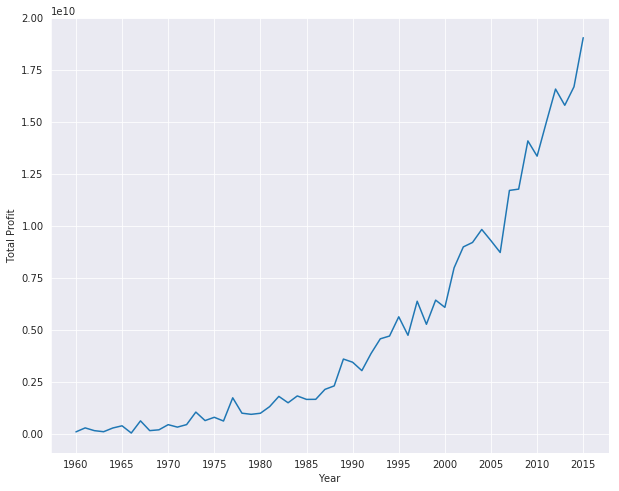

In [83]:
# total profit and mean of movies per year since 1960
#provide the sum of profit from 1960 to 2015
profit_sum = df.groupby('release_year')['profit'].sum()

#setting the figure size and dpi
plt.figure(figsize=(10,8))

#range of x axis elements
plt.xticks(np.arange(1960,2016,5));

##plot function which plots the graph
plt.plot(profit_sum);

#labels the x axis
plt.xlabel('Year');

#labels the y axis
plt.ylabel('Total Profit');


**From the above graph we can see that the total sum of profit year have increase and being the highest in 2015. We can say the sum of profits have been increased by approx of 35000% which is a too much.**

### Research Question 7 (Top 10 movies in terms of profit)

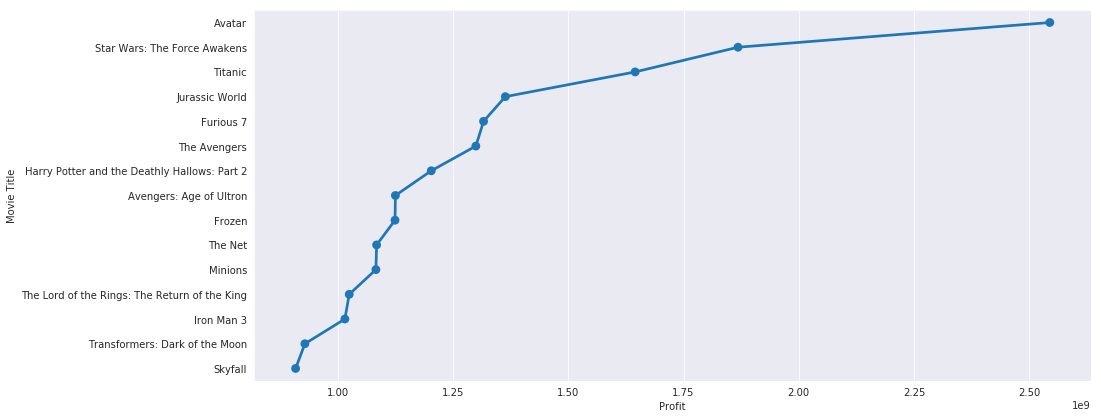

In [84]:
#generates the dataframe with max profit movies from low to high
top_10= df.sort_values(by=['profit'],ascending=False).head(15)

#extract the profit for the x axis
x=top_10.profit

#extract the movie title for the y axis
y=top_10.original_title

#plot the figure with specific figure size
plt.figure(figsize=(15,15))

#subplot graph together one after another or side by side
plt.subplot(2,1,1)

#plots the graph
sb.pointplot(x=x,y=y)

#defines the label for x axis
plt.xlabel('Profit')

#defines the label for y axis
plt.ylabel('Movie Title');

**From the above graph we can see that the top profitable movies include Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, Furious 7 and so on.**

### Research Question 8  (Top 10 movies in terms of revenue)

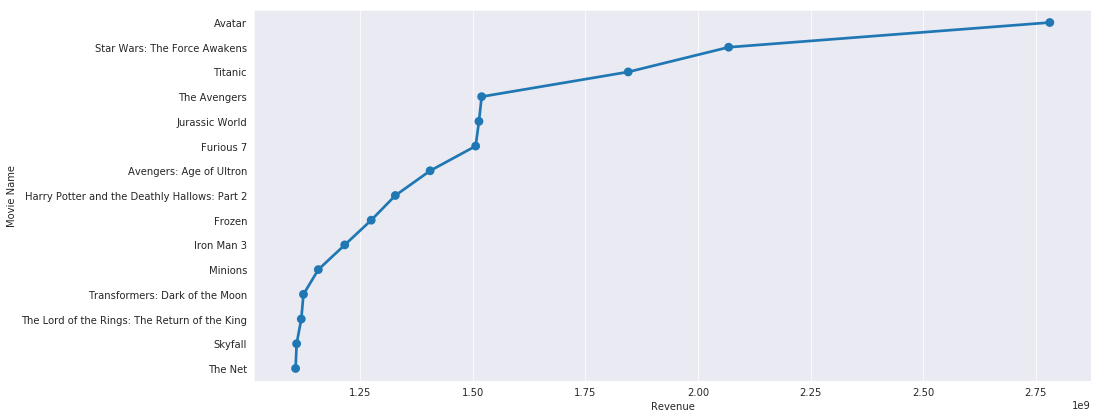

In [85]:
#generates the dataframe with max revenue movies from low to high
top_10_rev= df.sort_values(by=['revenue'],ascending=False).head(15)

#extract the revenue for the x axis
x=top_10_rev.revenue

#extract the movie title for the y axis
y=top_10_rev.original_title

#plot the figure with specific figure size
plt.figure(figsize=(15,15))

#subplot graph together one after another or side by side
plt.subplot(2,1,1)

#plots the graph
sb.pointplot(x=x,y=y)

#defines the label for x axis
plt.xlabel('Revenue');

#defines the label for y axis
plt.ylabel('Movie Name');

**From the above graph we can see that the top movies with maximum revenue include Avatar, Star Wars: The Force Awakens, Titanic, Jurassic World, Furious 7 and so on.**

### Research Question 9 (Top 10 movies in terms of budget)

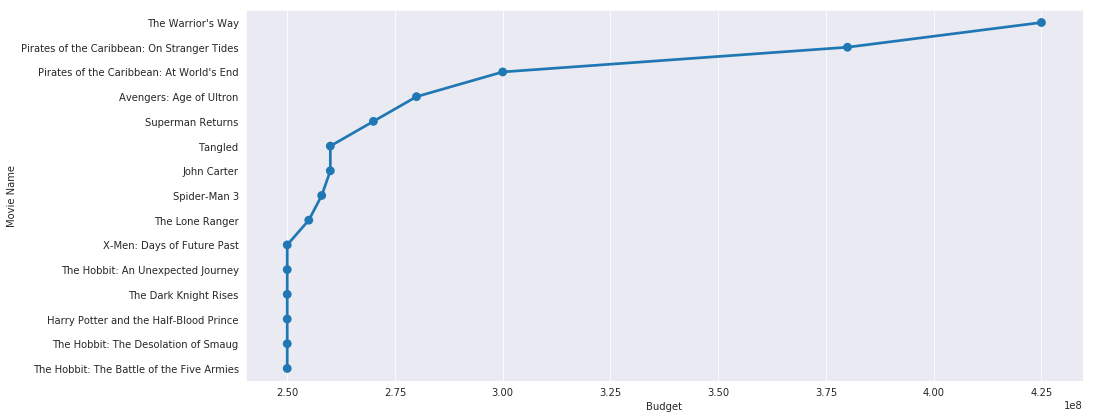

In [86]:
#generates the dataframe with max budget movies from low to high
top_10_bud= df.sort_values(by=['budget'],ascending=False).head(15)

#extract the budget for the x axis
x=top_10_bud.budget

#extract the movie title for the y axis
y=top_10_bud.original_title

#plot the figure with specific figure size
plt.figure(figsize=(15,15))

#subplot graph together one after another or side by side
plt.subplot(2,1,1)

#plots the graph
sb.pointplot(x=x,y=y)

#defines the label for x axis
plt.xlabel('Budget');

#defines the label for y axis
plt.ylabel('Movie Name');

**From the above graph we can see that the movies with top budget include The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Avengers: Age of Ultron, Superman Returns and so on.**

### Research Question 10  (Top 10 movies in terms of runtime)

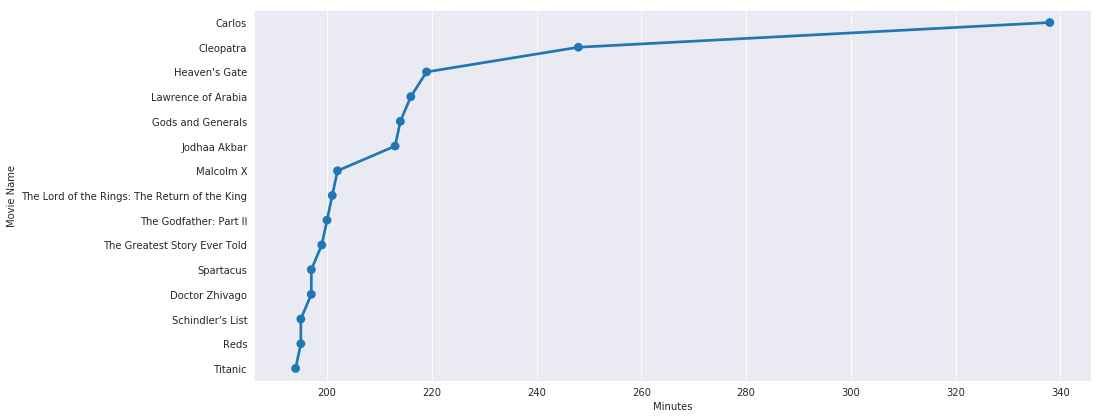

In [35]:
#generates the dataframe with max runtime movies from low to high
top_10= df.sort_values(by=['runtime'],ascending=False).head(15)

#extract the profit for the x axis
x=top_10.runtime

#extract the movie title for the y axis
y=top_10.original_title

#plot the figure with specific figure size
plt.figure(figsize=(15,15))

#subplot graph together one after another or side by side
plt.subplot(2,1,2)

#plots the graph
sb.pointplot(x=x,y=y)

#defines the label for x axis
plt.xlabel('Minutes');

#defines the label for y axis
plt.ylabel('Movie Name');

**From the above graph we can see that the movies with maximum runtime include Carlos, Cleopatra, Heaven's Gate, Lawrence of Arabia, Gods and Generals and so on.**

### Research Question 11  (How runtime,budget,profit and revenue has changed over time period)

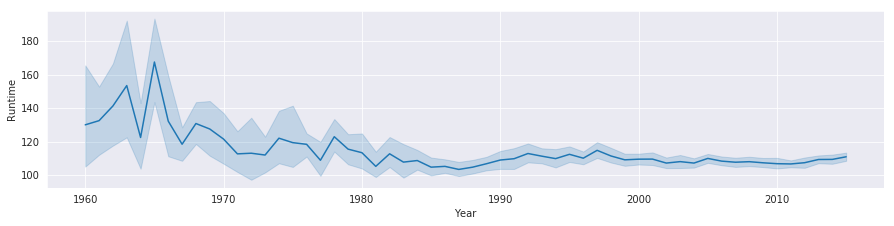

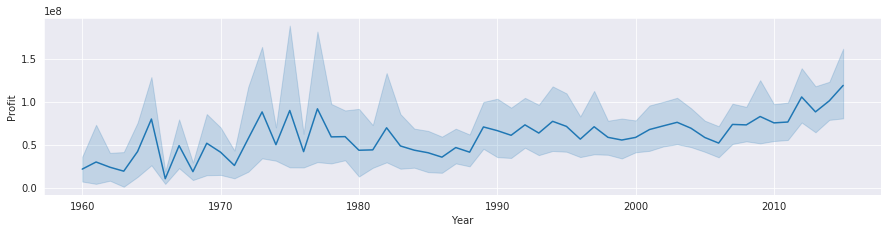

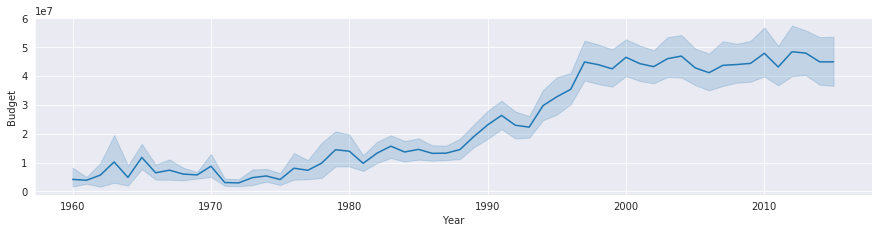

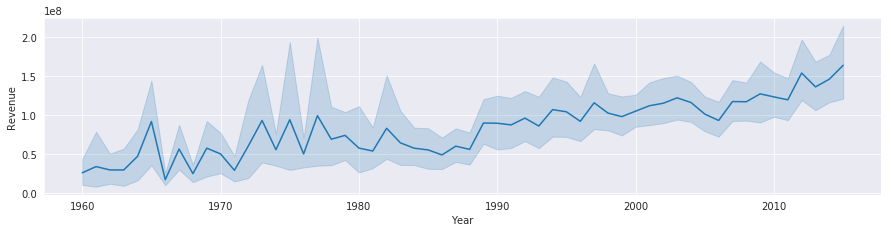

In [36]:
# plots how runtime has changed over the years
#plot the figure with specific figure size
plt.figure(figsize=(15,15))

#range the x axis labels
plt.xticks(np.arange(1960,2016,5))

#subplot graph together one after another or side by side
plt.subplot(4,1,1)

#plots the graph
sb.lineplot(x=df.release_year, y=df.runtime)
#defines the label for x axis
plt.xlabel('Year');

#defines the label for y axis
plt.ylabel('Runtime');



# plots how profit has changed over the years
#plot the figure with specific figure size
plt.figure(figsize=(15,15))

#range the x axis labels
plt.xticks(np.arange(1960,2016,5))

#subplot graph together one after another or side by side
plt.subplot(4,1,2)

#plots the graph
sb.lineplot(x=df.release_year, y=df.profit)
#defines the label for x axis
plt.xlabel('Year');

#defines the label for y axis
plt.ylabel('Profit');



# plots how budget has changed over the years
#plot the figure with specific figure size
plt.figure(figsize=(15,15))

#range the x axis labels
plt.xticks(np.arange(1960,2016,5))

#subplot graph together one after another or side by side
plt.subplot(4,1,3)

#plots the graph
sb.lineplot(x=df.release_year, y=df.budget)

#defines the label for x axis
plt.xlabel('Year');

#defines the label for y axis
plt.ylabel('Budget');



# plots how revenue has changed over the years
#plot the figure with specific figure size
plt.figure(figsize=(15,15))

#range the x axis labels
plt.xticks(np.arange(1960,2016,5))

#subplot graph together one after another or side by side
plt.subplot(4,1,4)

#plots the graph
sb.lineplot(x=df.release_year, y=df.revenue)

#defines the label for x axis
plt.xlabel('Year');

#defines the label for y axis
plt.ylabel('Revenue');

**From the above graphs we can see that as the year passes the runtime of the movies is reduced while revenue, budget and profit are increased. We can see that there is major increase in the budget post late 1990.**

### Research Question 12  (Which month has maximum number of releases?)

In [37]:
#forms a new column named released_month and take data from release_date to fill in months
df['released_month'] = pd.DatetimeIndex(df['release_date']).month

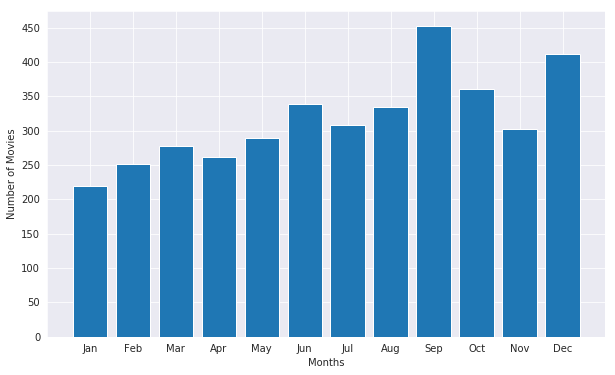

In [38]:
#create a series with months and movies released per month
mov_mon = df.released_month.value_counts().sort_index()

#converts the data to dataframe
mov_mon = pd.DataFrame(mov_mon)

#plot the figure with specific figure size
plt.figure(figsize=(10,6))

#range the x axis labels and labels the points 
plt.xticks(np.arange(1,13,1),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

#range the y axis labels
plt.yticks(np.arange(0,600,50))

#add a new column with months
mov_mon['month']=[1,2,3,4,5,6,7,8,9,10,11,12]

#plots the graph with x axis as mov
plt.bar(mov_mon.month,mov_mon.released_month )

#defines the label for y axis
plt.xlabel('Months');

#defines the label for y axis
plt.ylabel('Number of Movies');

**From the above graph we can see that most number of films are released in September and December.**

### Research Question 13  (Movies in which month makes the most profit)

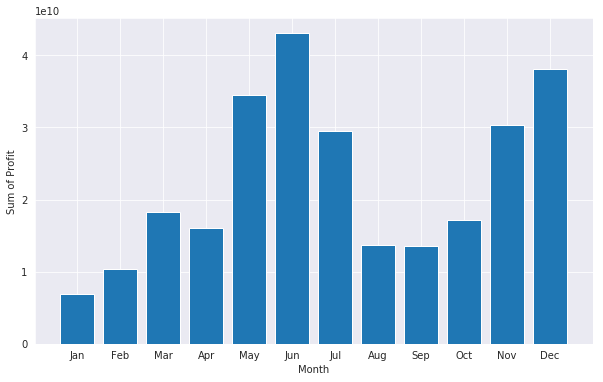

In [39]:
#extract the months index and sort it from 1-12
mon_data = np.sort(df.released_month.unique())

#plot the figure with specific figure size
plt.figure(figsize=(10,6))

#range the x axis labels and labels the points 
plt.xticks(np.arange(1,13,1),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

#groups data by month and sum of profit for each month
profit_month = df.groupby('released_month')['profit'].sum()

#plots the graph
plt.bar(mon_data,profit_month)

#defines the label for x axis
plt.xlabel('Month');

#defines the label for y axis
plt.ylabel('Sum of Profit');

**From the above graph we can see that most number of films are released in June and December are profitable so we can conclude that it is better to release in these two months.**

### Research Question 14  (Which genres has maximum number of movies)

In [40]:
#we will remove movies whose revenue is less than 50million so we can do the further investigation on successful movies
df_sucess = df.query('revenue>=50000000')

In [41]:
def data_count(column):
    #will take a column, and separate the string by '|'
    data_count = df_sucess[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data_count = pd.Series(data_count.split('|'))
    
    #arranging in descending order
    count = data_count.value_counts(ascending = False)
    
    return count

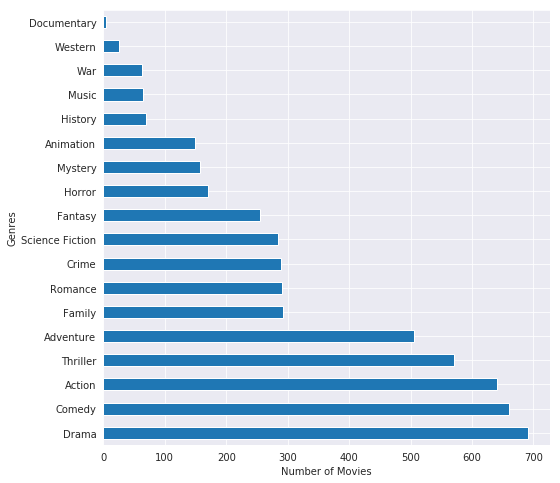

In [50]:
#counts the genre and sum no of movies each genre done
genres_top = data_count('genres')

#plot the figure with specific figure size
plt.figure(figsize=(8,8));

#plots the graph
genres_top.plot(kind='barh',color=sb.color_palette()[0]);

#defines the label for x axis
plt.xlabel('Number of Movies');

#defines the label for y axis
plt.ylabel('Genres');

**From the above chart, we can see that the top genres most successfull movies are in are Drama, Comedy, Action, Thriller and Adventure.**

### Research Question 15  (Which actor has maximum number of movies)


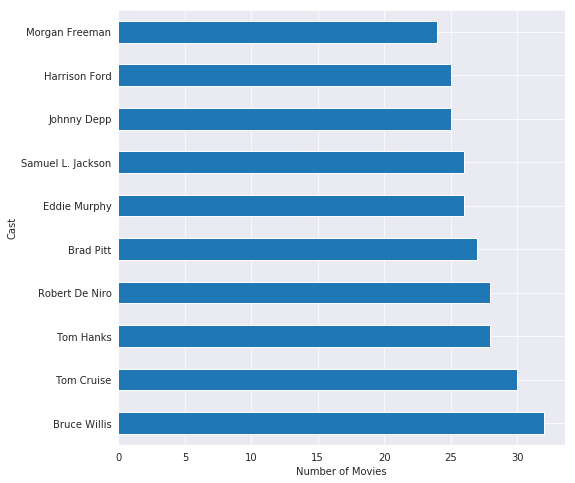

In [43]:
#counts the actors and and sum no of movies each have done
actor_max = data_count('cast')

#plot the figure with specific figure size
plt.figure(figsize=(8,8))

#plots the graph
actor_max.iloc[:10].plot(kind='barh',color=sb.color_palette()[0])

#defines the label for x axis
plt.xlabel('Number of Movies');

#defines the label for y axis
plt.ylabel('Cast');

**From the above chart, we can see that the top actors in successfull movies are in are Bruce Willis, Tom Cruise, Tom Hanks, Robert De Niro and Brad Pitt.**

### Research Question 16  (Which production companies has maximum number of movies)


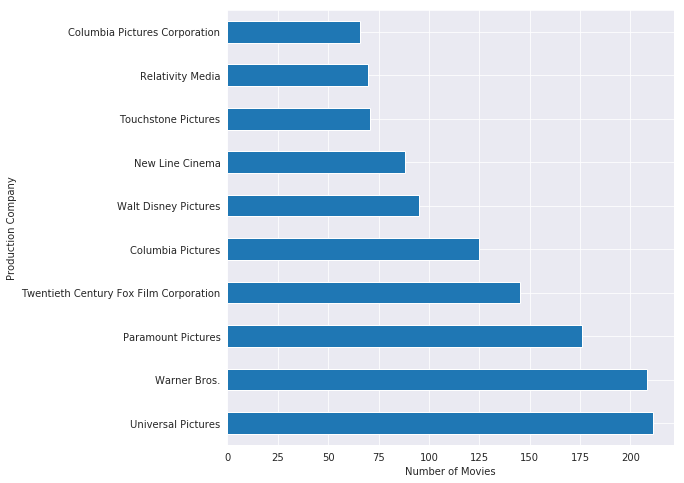

In [44]:
#counts the production companies and and sum no of movies each have done
prod_max = data_count('production_companies')

#plot the figure with specific figure size
plt.figure(figsize=(8,8))

#plots the graph
prod_max.iloc[:10].plot(kind='barh',color=sb.color_palette()[0])

#defines the label for x axis
plt.xlabel('Number of Movies');

#defines the label for y axis
plt.ylabel('Production Company');

**From the above chart, we can see that the top production companies for most successfull movies are Universal Pictures, Warner Bros, Paramount Pictures, Twentieth Century Fox Film Corporation, Columbia Pictures.**

### Research Question 17  (Which director has maximum number of movies)


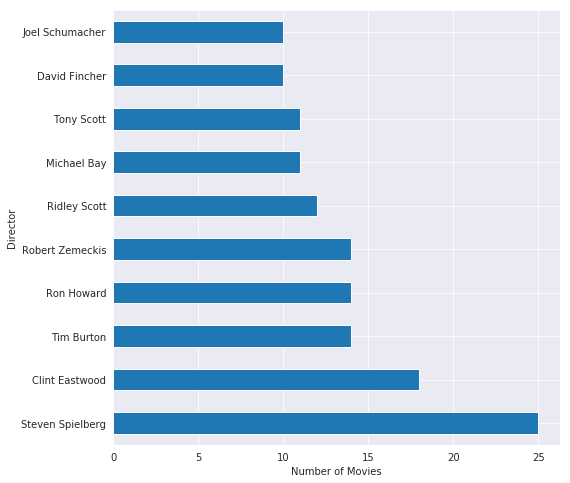

In [45]:
#counts the directors and sum no of movies each have done
dir_max = data_count('director')

#plot the figure with specific figure size
plt.figure(figsize=(8,8))

#plots the graph
dir_max.iloc[:10].plot(kind='barh',color=sb.color_palette()[0])

#defines the label for x axis
plt.xlabel('Number of Movies');

#defines the label for y axis
plt.ylabel('Director');

**From the above chart, we can see that the top director for most successfull movies are in are Steven Spielberg, Clint Eastwood, Tim Burton, Ron Howard, Robert Zemeckis.**

### Research Question 18  (How popularity, runitme, vote average, budget and revenue has affect on profit?)

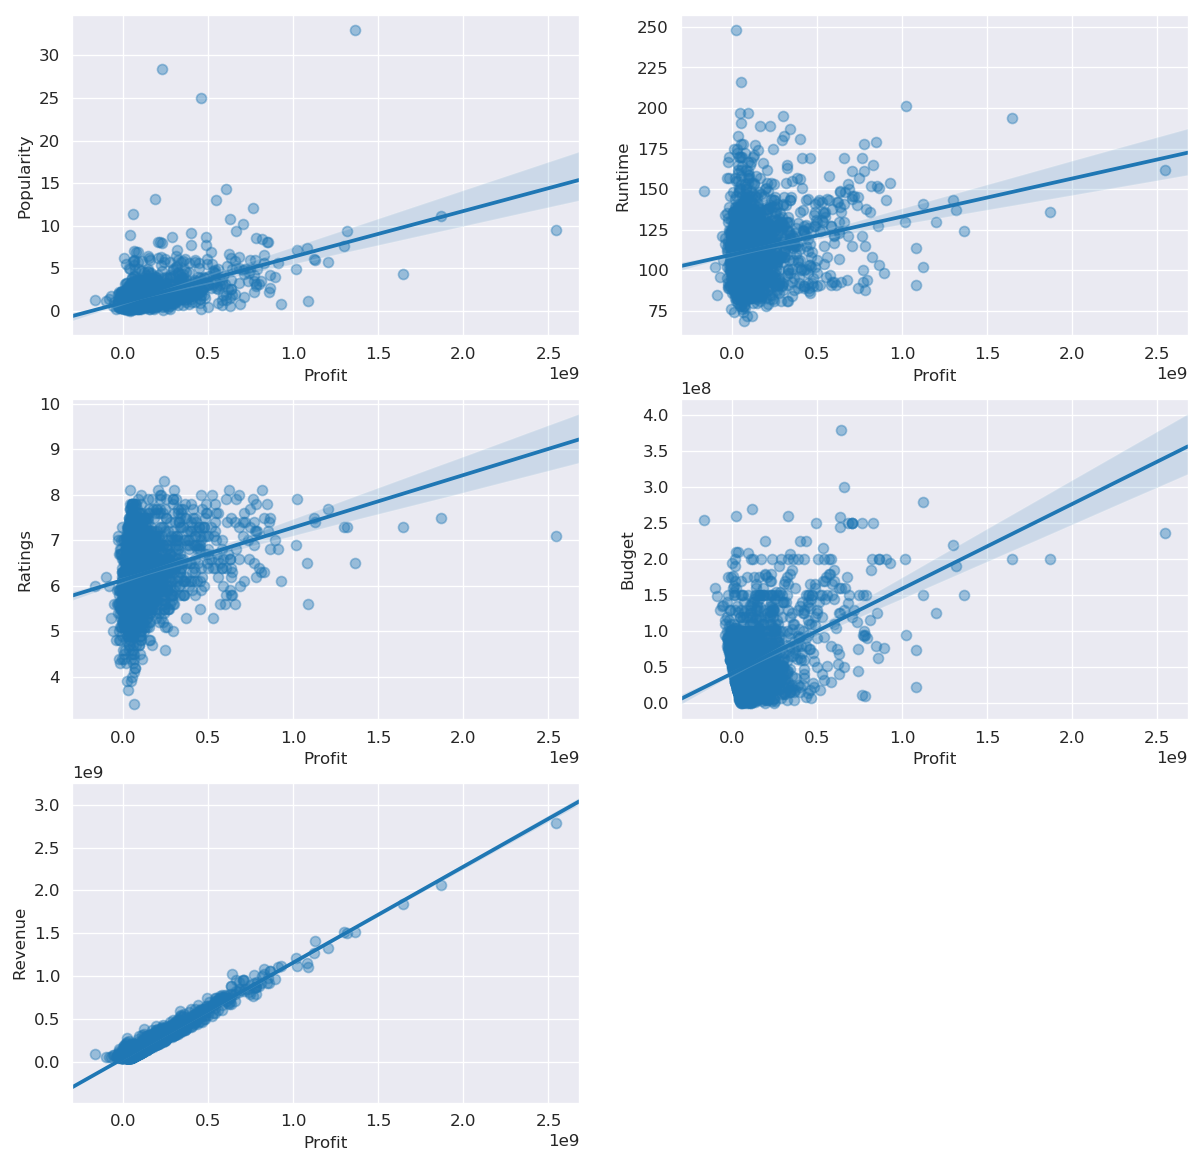

In [49]:
#profit vs popularity
#plot the figure with specific figure size
plt.figure(figsize=(12,12),dpi=120)

#subplot graph together one after another or side by side
plt.subplot(3,2,1)

#plots the graph
sb.regplot(x= df_sucess.profit, y=df_sucess.popularity, scatter_kws={'alpha':0.4} )

#defines the label for x axis
plt.xlabel('Profit');

#defines the label for y axis
plt.ylabel('Popularity');


#profit vs runtime
#subplot graph together one after another or side by side
plt.subplot(3,2,2)

#plots the graph
sb.regplot(x= df_sucess.profit, y=df_sucess.runtime, scatter_kws={'alpha':0.4} )

#defines the label for x axis
plt.xlabel('Profit');

#defines the label for y axis
plt.ylabel('Runtime');


#profit vs vote average
#subplot graph together one after another or side by side
plt.subplot(3,2,3)

#plots the graph
sb.regplot(x= df_sucess.profit, y=df_sucess.vote_average, scatter_kws={'alpha':0.4} )

#defines the label for x axis
plt.xlabel('Profit');

#defines the label for y axi
plt.ylabel('Ratings');



#profit vs budget
#subplot graph together one after another or side by side
plt.subplot(3,2,4)

#plots the graph
sb.regplot(x= df_sucess.profit, y=df_sucess.budget, scatter_kws={'alpha':0.4} )

#defines the label for x axis
plt.xlabel('Profit');

#defines the label for y axis
plt.ylabel('Budget');


#profit vs revenue
#subplot graph together one after another or side by side
plt.subplot(3,2,5)

#plots the graph
sb.regplot(x= df_sucess.profit, y=df_sucess.revenue, scatter_kws={'alpha':0.4} )

#defines the label for x axis
plt.xlabel('Profit');

#defines the label for y axis
plt.ylabel('Revenue');

**From the above scatter plots, we can see that every variable has positive correlation with profit.**

### Research Question 19  (How vote count affect vote average?)

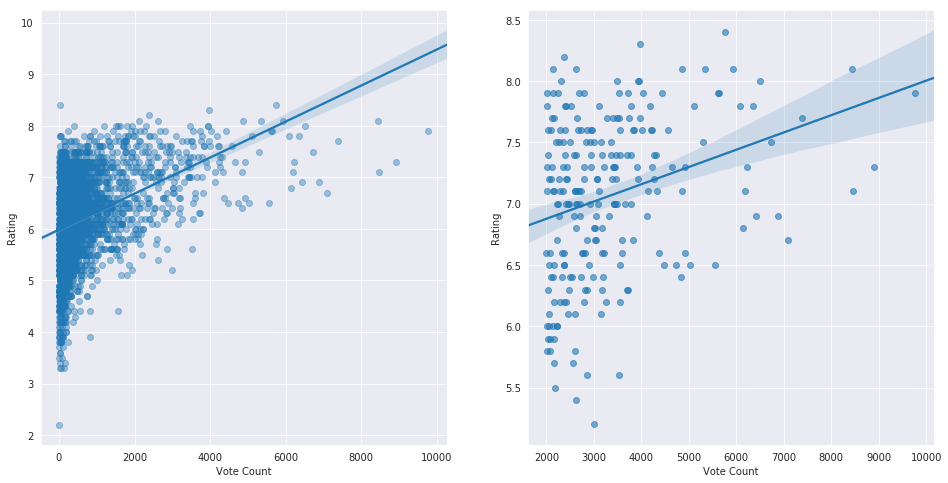

In [47]:
#plot for all vote_counts
#select row with only vote_count above 2000
df_vote = df.query('vote_count>=2000')

#plot the figure with specific figure size
plt.figure(figsize=(16,8))

#subplot graph together one after another or side by side
plt.subplot(1,2,1)

#plots the graph
sb.regplot(y = df.vote_average,x = df.vote_count, scatter_kws={'alpha':0.4})

#defines the label for x axis
plt.xlabel('Vote Count');

#defines the label for y axis
plt.ylabel('Rating');



#plot for vote_counts above 2000
#subplot graph together one after another or side by side
plt.subplot(1,2,2)

#plots the graph
sb.regplot(y = df_vote.vote_average,x = df_vote.vote_count, scatter_kws={'alpha':0.6})

#defines the label for x axis
plt.xlabel('Vote Count');

#defines the label for y axis
plt.ylabel('Rating');

**From the scatter plot we can say that as the vote count increase, the ratings increases. We created a plot for greater than 2000 votes to make the plot clearer.**

### Research Question 20 (How rating and runtime affect each other?)

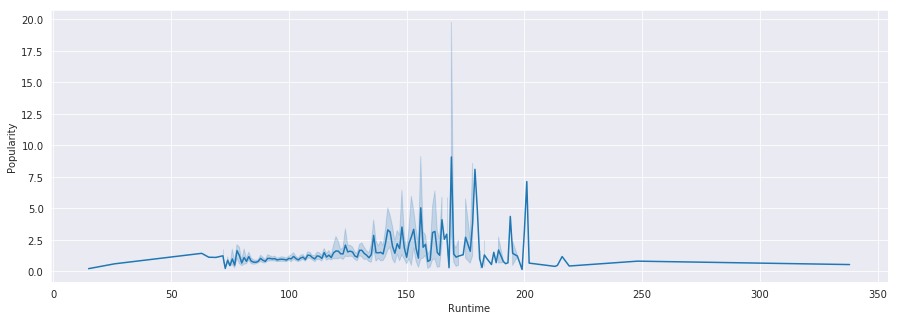

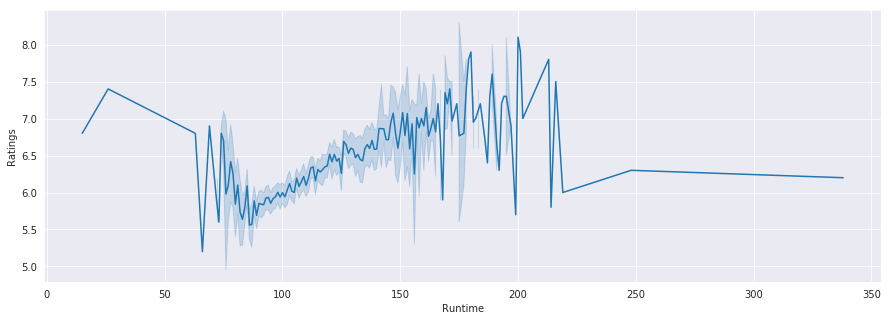

In [55]:
#plots figure with specified size
plt.figure(figsize=(15,5))

#plot the graph
sb.lineplot(x=df.runtime,y=df.popularity)

#defines the label for x axis
plt.xlabel('Runtime');

#defines the label for y axis
plt.ylabel('Popularity');




#plots figure with specified size
plt.figure(figsize=(15,5))

#plot the graph
sb.lineplot(x=df.runtime,y=df.vote_average)

#defines the label for x axis
plt.xlabel('Runtime');

#defines the label for y axis
plt.ylabel('Ratings');

**From the above line plot we can say that movie with runtime between 170-190 are most rated and popular.**

<a id='conclusions'></a>
## Conclusions

If I wanted to do a movie, I would go for genres like Drama, Comedy or Drama. I would like Bruce Willis, Tom Cruise or Tom Hanks to work in it and the director should be Steven Spielberg, Clint Eastwood, or Tim Burton. From the analysis, we can say that movies with all the above variables happens to be successful. The production company chosen can be Universal Pictures or Warner Bros. Also, the runtime of the movie should be between 170-190 minutes and the movie can be released in June and December for maximum profit. This could be cause of summer and winter break.  Also, the data suggests that the revenue and budget is uptrend and as the time passes, the budget and revenue increases while there is a downtrend in runtime, and it seems to decrease year by year. This analysis doesn’t guarantee a movie will earn more than 50million if all the rules above are followed but it will attract more people if these variables are included in the movie so the chances of profit is more. We can also see that movies with more budget tends to earn more profit. 
Limitation: All the data is limited to this dataset and many rows were deleted because of missing data reducing the data rows from around 10000 to 3800. This affects the analysis. Also, no statistical test were done on the data so providing statistical conclusion is not possible

In [87]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0